In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
plt.rcParams['axes.facecolor'] = 'bisque'

# FO

### Data collection:-

<b>----26 July</b> 

From SRStockAlertBot (Free channel)

<b>----30 Sept</b>

From SRStockAlertBot_FnO (Paid channel)    +    4 alerts from SRStockAlertBot (not present in SRStockAlertBot_FnO)

<b>----Current</b>

In [20]:
dfcf = pd.read_excel('D:/Yash/Python Projects/tgm_stk_tkr/default/data/FnO.xlsx')

In [21]:
# total alerts
total_alertsFO = dfcf.shape[0]
total_alertsFO

589

In [22]:
# Total bullish alerts
total_bullFO = dfcf[dfcf.Type=='Bullish'].shape[0]
total_bullFO

419

In [23]:
#Total bearish alerts
total_bearFO = dfcf[dfcf.Type=='Bearish'].shape[0]
total_bearFO

170

In [24]:
#Total stagnant alerts
StagnantFO = dfcf[dfcf.Result=='STAGNANT'].shape[0]
StagnantFO

21

In [25]:
dfcf[dfcf.Result=='STAGNANT'].Type.value_counts()

Bullish    19
Bearish     2
Name: Type, dtype: int64

#### removing OPEN alerts

In [26]:
ons1 = dfcf[dfcf.Result=='ON'].index # Identify OPEN/ON alerts
len(ons1), ons1 # all will be from current month

(10, Int64Index([0, 1, 4, 55, 56, 57, 58, 62, 65, 66], dtype='int64'))

In [27]:
on_count = dfcf.iloc[ons1, :].Type.value_counts()
on_count

Bullish    8
Bearish    2
Name: Type, dtype: int64

In [28]:
dfcf.drop(ons1, axis=0, inplace=True) # Drop the ON alerts from analysis
dfcf.shape

(579, 14)

### Target achieved v/s SL Hit chart

#### 0.5 weightage to STAGNANT

In [56]:
# Total Target achieved and SL Hit alerts
TA = dfcf[dfcf['result dummy']=='Target achieved'].shape[0]
SL = dfcf[dfcf['result dummy']=='SL Hit'].shape[0]
TA, SL

(380, 178)

In [57]:
# Total stagnant alerts
StagnantFO

21

In [58]:
# (+)ive & (-)ive STAGNANT alerts
n1 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bullish') & (dfcf['15DayClose']<dfcf.Price)].shape[0]
p1 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bullish') & (dfcf['15DayClose']>dfcf.Price)].shape[0]

n2 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bearish') & (dfcf['15DayClose']>dfcf.Price)].shape[0]
p2 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bearish') & (dfcf['15DayClose']<dfcf.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(2, 19)

In [59]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(381.0, 187.5)

In [60]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 67.02, 'SL Hit': 32.98}

Text(0, 0.5, '%')

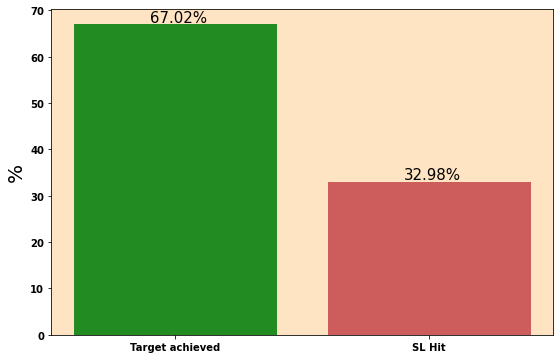

In [73]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

### (T1-T3) intra comparison

In [35]:
# TAstat = dfcf[dfcf.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
# TAstat = TAstat.sort_index()

# ax = plt.axes()

# TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

# for i,j in enumerate(TAstat.to_dict()):
#     ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

# #plt.grid(axis='y', lw=0.5)
# ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
# plt.yticks(fontweight='bold')
# plt.xticks(rotation=0, fontweight='bold')
# plt.ylabel(ylabel='%', fontsize=20)

### Avg NoD

In [36]:
# Avg no. of days needed to reach the highest target
FO_avg_nod = dfcf[dfcf['result dummy']=='Target achieved'].NoD.mean()
FO_avg_nod

5.7105263157894735

### Bullish v/s Bearish alerts

#### Bullish

In [37]:
# Total bullish alerts
bull = dfcf[dfcf.Type=='Bullish']
print(bull.shape[0]) 
try:
    print(f"In actual {total_bullFO}, +{on_count['Bullish']} that were removed as ON alerts")
except:
    print(f"In actual {total_bullFO}")

411
In actual 419, +8 that were removed as ON alerts


In [38]:
# Total Target achieved and SL Hit alerts in bull df
TA = bull[bull['result dummy']=='Target achieved'].shape[0]
SL = bull[bull['result dummy']=='SL Hit'].shape[0]
TA, SL

(265, 127)

In [39]:
# Total stagnant alerts in Bullish alerts
bull[bull['result dummy']=='STAGNANT'].shape[0]

19

In [40]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']<bull.Price)].shape[0]
p = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']>bull.Price)].shape[0]
p,n

(2, 17)

In [41]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(266.0, 135.5)

In [42]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 66.25, 'SL Hit': 33.75}

Text(0, 0.5, '%')

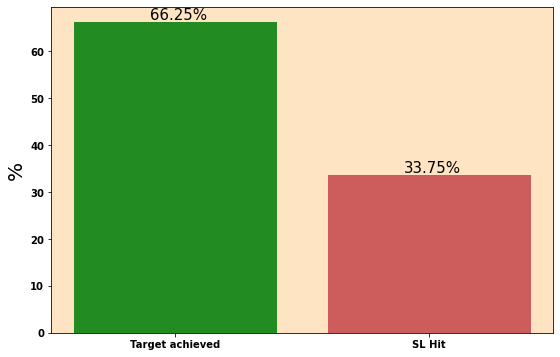

In [43]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### Bearish

In [44]:
# Total bearish alerts
bear = dfcf[dfcf.Type=='Bearish']
print(bear.shape[0])
try:
    print(f"In actual {total_bearFO}, +{on_count['Bearish']} that were removed as ON alerts")
except:
    print(f"In actual {total_bearFO}")

168
In actual 170, +2 that were removed as ON alerts


In [45]:
# Total Target achieved and SL Hit alerts in bear df
TA = bear[bear['result dummy']=='Target achieved'].shape[0]
SL = bear[bear['result dummy']=='SL Hit'].shape[0]
TA, SL

(115, 51)

In [46]:
# Total stagnant alerts in bearish alerts
bear[bear['result dummy']=='STAGNANT'].shape[0]

2

In [47]:
# (+)ive & (-)ive STAGNANT alerts in bear df
n = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']>bear.Price)].shape[0]
p = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']<bear.Price)].shape[0]
p,n

(0, 2)

In [48]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(115.0, 52.0)

In [49]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 68.86, 'SL Hit': 31.14}

Text(0, 0.5, '%')

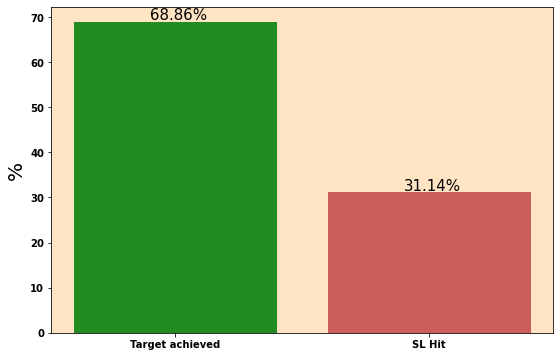

In [50]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

## Monthly Analysis

In [51]:
dfm = dfcf.sort_values(by='Date').set_index('Date')

In [52]:
months = []
mos = pd.Series(dfm.index.to_numpy().astype('datetime64[M]')).unique()
for mo in mos:
    months.append(dt.datetime.date(pd.to_datetime(mo)).strftime(format="%b%y"))

In [53]:
monthly_stats = []
monthlyTA_stats = []
monthly_alerts = []
for i in months:
    month = dt.datetime.strptime(i, "%b%y").month                                               # current_month
    year = dt.datetime.strptime(i, "%b%y").year                                                 # current_year
    end = calendar.monthrange(year, month)[1]                      
    current_month = dfm.loc[f"{year}-{month}-01":f"{year}-{month}-{end}"]                  # get that month's df
    
    monthly_alerts.append(current_month.shape[0])                                   # total alerts in current month
    
    # Total Target achieved and SL Hit alerts in current month
    TA = current_month[current_month['result dummy']=='Target achieved'].shape[0]
    SL = current_month[current_month['result dummy']=='SL Hit'].shape[0]
    
    # (+)ive & (-)ive STAGNANT alerts
    n1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']<current_month.Price)].shape[0]
    p1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']>current_month.Price)].shape[0]

    n2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']>current_month.Price)].shape[0]
    p2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']<current_month.Price)].shape[0]

    p = p1 + p2
    n = n1 + n2

    TA += p*0.5
    SL += n*0.5 
    current_stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
    monthly_stats.append(current_stat)
    
#     TAstat = current_month[current_month.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
#     if len(TAstat.index)<3:
#         y = ['T1','T2','T3']
#         TAstat[list(set(y).difference(set(TAstat.index)))[0]] = 0.0
#     TAstat = TAstat.sort_index()
#     monthlyTA_stats.append(TAstat)

### Line chart

In [54]:
line_data = ([x['Target achieved'] for x in monthly_stats]), ([x['SL Hit'] for x in monthly_stats])

In [55]:
# Including month of july 
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, line_data[0], marker='o', color='darkgreen')
ax.plot(months, line_data[1], marker='o', color='red')
ax.grid(axis='y', lw=0.25)
#ax.set_ylim(0, 100)
ax.set_title(f'Totals alerts in {months[-1]}: {monthly_alerts[-1] + len(ons1)}; OPEN alerts: {len(ons1)}')

for i,j in enumerate(line_data[0]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j+1), xycoords='data', fontsize=11, color='darkgreen')
    
for i,j in enumerate(line_data[1]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j-3), xycoords='data', fontsize=11, color='red')

ax.legend(['Target achieved %', 'SL Hit %'], loc='best', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('Target & SL Hit in %', fontsize=16)

ax2 = ax.twinx()
ax2.plot(months, monthly_alerts, marker='o')
ax2.set_ylabel('No. of alerts', fontsize=14, rotation=-90, labelpad=13)
ax2.legend(labels=['# of closed alerts'], loc='best', bbox_to_anchor=(0.993, 0.899), facecolor='white')

for i,j in enumerate(monthly_alerts):
    ax2.annotate(s=j, xy=(i+0.1, j+1), xycoords='data', fontsize=11, color='blue')

In [39]:
# fig, ax = plt.subplots(figsize=(10,7))
# ax.set_facecolor('white')

# ax.plot(months, np.array(monthlyTA_stats)[:, 0], marker='o', color='darkgreen')
# ax.plot(months, np.array(monthlyTA_stats)[:, 1], marker='o', color='saddlebrown')
# ax.plot(months, np.array(monthlyTA_stats)[:, 2], marker='o', color='darkslategrey')
# ax.grid(axis='y', lw=0.3)
# #ax.set_ylim(0, 100)

# for i,j in enumerate(np.array(monthlyTA_stats)):
#     ax.annotate(s=f'{round(j[0],2)}', xy=(i-0.1, j[0]+1), xycoords='data', fontsize=11, color='darkgreen')
#     ax.annotate(s=f'{round(j[1],2)}', xy=(i-0.1, j[1]+1), xycoords='data', fontsize=11, color='saddlebrown')    
#     ax.annotate(s=f'{round(j[2],2)}', xy=(i-0.1, j[2]+1), xycoords='data', fontsize=11, color='darkslategrey')  
    
# ax.legend(['% alerts that did not hit T2 & T3', 'T2', 'T3'], loc='best', facecolor='white')
# ax.set_xticklabels(labels = months, fontweight='bold')
# ax.set_ylabel('alerts that hit T1/T2/T3 in % of Total Target achieved', fontsize=12)

# NCASH

### Data collection:-

<b>----01 Oct</b> 

From SRStockAlertBot (Free channel)

<b>----Current</b>

In [40]:
dfcn = pd.read_excel('D:/Yash/Python Projects/tgm_stk_tkr/default/data/NCASH.xlsx')

In [41]:
# total alerts
total_alertsNC = dfcn.shape[0]
total_alertsNC

129

In [42]:
# Total bullish alerts
total_bullNC = dfcn[dfcn.Type=='Bullish'].shape[0]
total_bullNC

129

In [43]:
#Total bearish alerts
total_bearNC = dfcn[dfcn.Type=='Bearish'].shape[0]
total_bearNC

0

In [44]:
#Total stagnant alerts
StagnantNC = dfcn[dfcn.Result=='STAGNANT'].shape[0]
StagnantNC

5

In [45]:
dfcn[dfcn.Result=='STAGNANT'].Type.value_counts()

Bullish    5
Name: Type, dtype: int64

#### removing OPEN alerts

In [46]:
ons2 = dfcn[dfcn.Result=='ON'].index # Identify OPEN/ON alerts
len(ons2), ons2 # all will be from current month

(1, Int64Index([0], dtype='int64'))

In [47]:
on_count = dfcn.iloc[ons2, :].Type.value_counts()
on_count

Bullish    1
Name: Type, dtype: int64

In [48]:
dfcn.drop(ons2, axis=0, inplace=True) # Drop the ON alerts from analysis
dfcn.shape

(128, 14)

### Target achieved v/s SL Hit chart

#### 0.5 weightage to STAGNANT

In [49]:
# Total Target achieved and SL Hit alerts
TA = dfcn[dfcn['result dummy']=='Target achieved'].shape[0]
SL = dfcn[dfcn['result dummy']=='SL Hit'].shape[0]
TA, SL

(84, 39)

In [50]:
# Total stagnant alerts
StagnantNC

5

In [51]:
# (+)ive & (-)ive STAGNANT alerts
n1 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bullish') & (dfcn['15DayClose']<dfcn.Price)].shape[0]
p1 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bullish') & (dfcn['15DayClose']>dfcn.Price)].shape[0]

n2 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bearish') & (dfcn['15DayClose']>dfcn.Price)].shape[0]
p2 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bearish') & (dfcn['15DayClose']<dfcn.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(2, 3)

In [52]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(85.0, 40.5)

In [53]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 67.73, 'SL Hit': 32.27}

Text(0, 0.5, '%')

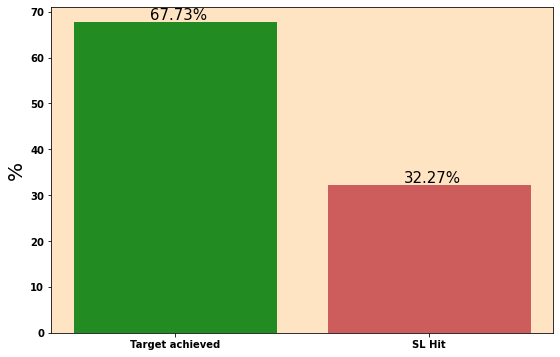

In [54]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

In [55]:
# TAstat = dfcn[dfcn.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
# TAstat = TAstat.sort_index()

# ax = plt.axes()

# TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

# for i,j in enumerate(TAstat.to_dict()):
#     ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

# #plt.grid(axis='y', lw=0.5)
# ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
# plt.yticks(fontweight='bold')
# plt.xticks(rotation=0, fontweight='bold')
# plt.ylabel(ylabel='%', fontsize=20)

### Avg NoD

In [56]:
# Avg no. of days needed to hit T1
dfcn[dfcn['result dummy']=='Target achieved'].NoD.mean()

5.095238095238095

### Bullish v/s Bearish alerts

#### Bullish

In [57]:
# Total bullish alerts
bull = dfcn[dfcn.Type=='Bullish']
print(bull.shape[0])
try:
    print(f"In actual {total_bullNC}, +{on_count['Bullish']} that were removed as ON alerts")
except:
    print(f"In actual {total_bullNC}")

128
In actual 129, +1 that were removed as ON alerts


In [58]:
# Total Target achieved and SL Hit alerts in bull df
TA = bull[bull['result dummy']=='Target achieved'].shape[0]
SL = bull[bull['result dummy']=='SL Hit'].shape[0]
TA, SL

(84, 39)

In [59]:
# Total stagnant alerts in Bullish alerts
bull[bull['result dummy']=='STAGNANT'].shape[0]

5

In [60]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']<bull.Price)].shape[0]
p = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']>bull.Price)].shape[0]
p, n

(2, 3)

In [61]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(85.0, 40.5)

In [62]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 67.73, 'SL Hit': 32.27}

Text(0, 0.5, '%')

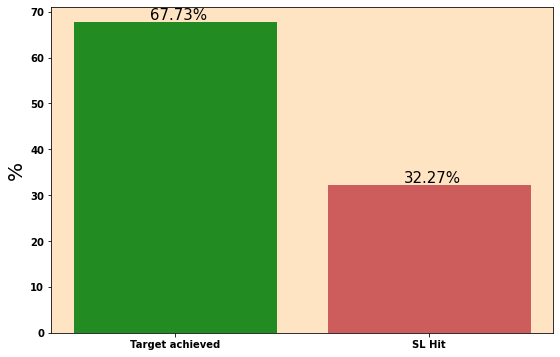

In [63]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### Bearish

In [64]:
# No bearish alerts generated in Cash_N500 segement
bear = dfcn[dfcn.Type=='Bearish']
bear.shape

(0, 14)

## Monthly Analysis

In [65]:
dfm = dfcn.sort_values(by='Date').set_index('Date')

In [66]:
months = []
mos = pd.Series(dfm.index.to_numpy().astype('datetime64[M]')).unique()
for mo in mos:
    months.append(dt.datetime.date(pd.to_datetime(mo)).strftime(format="%b%y"))

In [67]:
monthly_stats = []
monthlyTA_stats = []
monthly_alerts = []
for i in months:
    month = dt.datetime.strptime(i, "%b%y").month                                               # current_month
    year = dt.datetime.strptime(i, "%b%y").year                                                 # current_year
    end = calendar.monthrange(year, month)[1]                      
    current_month = dfm.loc[f"{year}-{month}-01":f"{year}-{month}-{end}"]                  # get that month's df
    
    monthly_alerts.append(current_month.shape[0])                                   # total alerts in current month
    
    # Total Target achieved and SL Hit alerts in current month
    TA = current_month[current_month['result dummy']=='Target achieved'].shape[0]
    SL = current_month[current_month['result dummy']=='SL Hit'].shape[0]
    
    # (+)ive & (-)ive STAGNANT alerts
    n1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']<current_month.Price)].shape[0]
    p1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']>current_month.Price)].shape[0]

    n2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']>current_month.Price)].shape[0]
    p2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']<current_month.Price)].shape[0]

    p = p1 + p2
    n = n1 + n2
    
    # Weightage of 0.5 to TA & SL
    TA += p*0.5
    SL += n*0.5 
    
    current_stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
    monthly_stats.append(current_stat)
    
#     TAstat = current_month[current_month.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
#     if len(TAstat.index)<3:
#         y = ['T1','T2','T3']
#         TAstat[list(set(y).difference(set(TAstat.index)))[0]] = 0.0
#     TAstat = TAstat.sort_index()
#     monthlyTA_stats.append(TAstat)

### Line chart

In [68]:
line_data = ([x['Target achieved'] for x in monthly_stats]), ([x['SL Hit'] for x in monthly_stats])

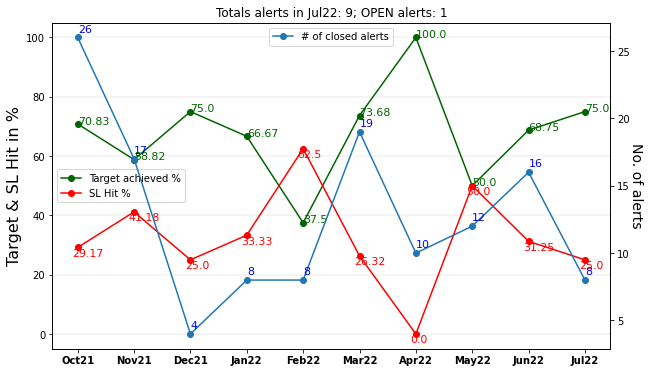

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, line_data[0], marker='o', color='darkgreen')
ax.plot(months, line_data[1], marker='o', color='red')
ax.grid(axis='y', lw=0.25)
#ax.set_ylim(0, 100)
ax.set_title(f'Totals alerts in {months[-1]}: {monthly_alerts[-1] + len(ons2)}; OPEN alerts: {len(ons2)}')

for i,j in enumerate(line_data[0]):
    ax.annotate(s=f'{round(j,2)}', xy=(i, j), xycoords='data', fontsize=11, color='darkgreen')
    
for i,j in enumerate(line_data[1]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j-3), xycoords='data', fontsize=11, color='red')

ax.legend(['Target achieved %', 'SL Hit %'], loc='center left', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('Target & SL Hit in %', fontsize=16)

ax2 = ax.twinx()
ax2.plot(months, monthly_alerts, marker='o')
ax2.set_ylabel('No. of alerts', fontsize=14, rotation=-90, labelpad=13)
ax2.legend(labels=['# of closed alerts'], loc='upper center', facecolor='white')

for i,j in enumerate(monthly_alerts):
    ax2.annotate(s=j, xy=(i, j+0.4), xycoords='data', fontsize=11, color='blue')

In [70]:
# fig, ax = plt.subplots(figsize=(10,7))
# ax.set_facecolor('white')

# ax.plot(months, np.array(monthlyTA_stats)[:, 0], marker='o', color='darkgreen')
# ax.plot(months, np.array(monthlyTA_stats)[:, 1], marker='o', color='saddlebrown')
# ax.plot(months, np.array(monthlyTA_stats)[:, 2], marker='o', color='darkslategrey')
# ax.grid(axis='y', lw=0.3)
# #ax.set_ylim(0, 100)

# for i,j in enumerate(np.array(monthlyTA_stats)):
#     ax.annotate(s=f'{round(j[0],2)}', xy=(i-0.1, j[0]+1), xycoords='data', fontsize=11, color='darkgreen')
#     ax.annotate(s=f'{round(j[1],2)}', xy=(i-0.1, j[1]+1), xycoords='data', fontsize=11, color='saddlebrown')    
#     ax.annotate(s=f'{round(j[2],2)}', xy=(i-0.1, j[2]+1), xycoords='data', fontsize=11, color='darkslategrey')  
    
# ax.legend(['% alerts that did not hit T2 & T3', 'T2', 'T3'], loc='upper right', bbox_to_anchor=(1, 0.3), facecolor='white')
# ax.set_xticklabels(labels = months, fontweight='bold')
# ax.set_ylabel('alerts that hit T1/T2/T3 in % of Total Target achieved', fontsize=12)

# NCASH_Other

In [71]:
dfno = pd.read_excel('D:/Yash/Python Projects/tgm_stk_tkr/default/data/NCASH_Other.xlsx')

In [72]:
# total alerts
total_alertsNO = dfno.shape[0]
total_alertsNO

95

In [73]:
# Total bullish alerts
total_bullNO = dfno[dfno.Type=='Bullish'].shape[0]
total_bullNO

95

In [74]:
#Total bearish alerts
total_bearNO = dfno[dfno.Type=='Bearish'].shape[0]
total_bearNO

0

In [75]:
#Total stagnant alerts
StagnantNO = dfno[dfno.Result=='STAGNANT'].shape[0]
StagnantNO

0

In [76]:
dfno[dfno.Result=='STAGNANT'].Type.value_counts()

Series([], Name: Type, dtype: int64)

#### removing OPEN alerts

In [77]:
ons3 = dfno[dfno.Result=='ON'].index # Identify OPEN/ON alerts
len(ons3), ons3 # all will be from current month

(3, Int64Index([0, 4, 12], dtype='int64'))

In [78]:
on_count = dfno.iloc[ons3, :].Type.value_counts()
on_count

Bullish    3
Name: Type, dtype: int64

In [79]:
dfno.drop(ons3, axis=0, inplace=True) # Drop the ON alerts from analysis
dfno.shape

(92, 14)

### Target achieved v/s SL Hit chart

#### 0.5 weightage to STAGNANT

In [80]:
# Total Target achieved and SL Hit alerts
TA = dfno[dfno['result dummy']=='Target achieved'].shape[0]
SL = dfno[dfno['result dummy']=='SL Hit'].shape[0]
TA, SL

(76, 16)

In [81]:
# Total stagnant alerts
StagnantNO

0

In [82]:
# (+)ive & (-)ive STAGNANT alerts
n1 = dfno[(dfno['result dummy']=='STAGNANT') & (dfno.Type=='Bullish') & (dfno['15DayClose']<dfno.Price)].shape[0]
p1 = dfno[(dfno['result dummy']=='STAGNANT') & (dfno.Type=='Bullish') & (dfno['15DayClose']>dfno.Price)].shape[0]

n2 = dfno[(dfno['result dummy']=='STAGNANT') & (dfno.Type=='Bearish') & (dfno['15DayClose']>dfno.Price)].shape[0]
p2 = dfno[(dfno['result dummy']=='STAGNANT') & (dfno.Type=='Bearish') & (dfno['15DayClose']<dfno.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 0)

In [83]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(76.0, 16.0)

In [84]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 82.61, 'SL Hit': 17.39}

Text(0, 0.5, '%')

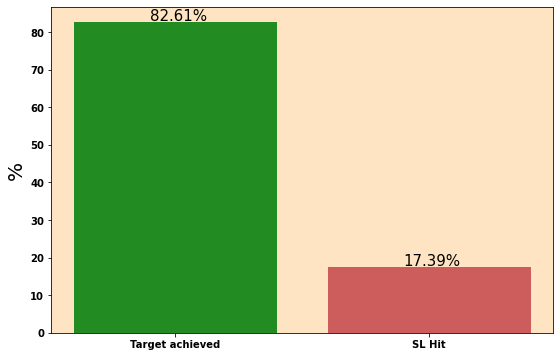

In [85]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

In [86]:
# TAstat = dfno[dfno.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
# TAstat = TAstat.sort_index()

# ax = plt.axes()

# TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

# for i,j in enumerate(TAstat.to_dict()):
#     ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

# #plt.grid(axis='y', lw=0.5)
# ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
# plt.yticks(fontweight='bold')
# plt.xticks(rotation=0, fontweight='bold')
# plt.ylabel(ylabel='%', fontsize=20)

### Avg NoD

In [87]:
# Avg no. of days needed to hit T1
dfno[dfno['result dummy']=='Target achieved'].NoD.mean()

2.0789473684210527

### Bullish v/s Bearish alerts

#### Bullish

In [88]:
# Total bullish alerts
bull = dfno[dfno.Type=='Bullish']
print(bull.shape[0])
try:
    print(f"In actual {total_bullNO}, +{on_count['Bullish']} that were removed as ON alerts")
except:
    print(f"In actual {total_bullNO}")

92
In actual 95, +3 that were removed as ON alerts


In [89]:
# Total Target achieved and SL Hit alerts in bull df
TA = bull[bull['result dummy']=='Target achieved'].shape[0]
SL = bull[bull['result dummy']=='SL Hit'].shape[0]
TA, SL

(76, 16)

In [90]:
# Total stagnant alerts in Bullish alerts
bull[bull['result dummy']=='STAGNANT'].shape[0]

0

In [91]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']<bull.Price)].shape[0]
p = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']>bull.Price)].shape[0]
p, n

(0, 0)

In [92]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(76.0, 16.0)

In [93]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 82.61, 'SL Hit': 17.39}

Text(0, 0.5, '%')

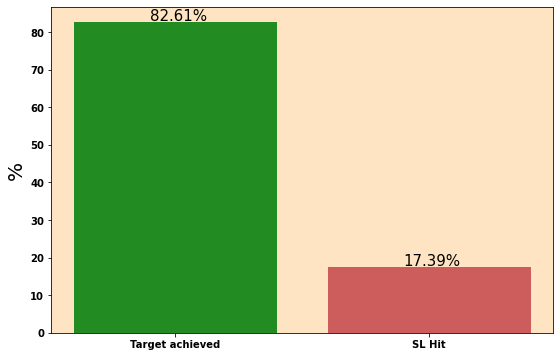

In [94]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### Bearish

In [95]:
# No bearish alerts generated in Cash_N500_Other segement
bear = dfno[dfno.Type=='Bearish']
bear.shape

(0, 14)

## Monthly Analysis

In [96]:
dfm = dfno.sort_values(by='Date').set_index('Date')

In [97]:
months = []
mos = pd.Series(dfm.index.to_numpy().astype('datetime64[M]')).unique()
for mo in mos:
    months.append(dt.datetime.date(pd.to_datetime(mo)).strftime(format="%b%y"))

In [98]:
monthly_stats = []
monthlyTA_stats = []
monthly_alerts = []
for i in months:
    month = dt.datetime.strptime(i, "%b%y").month                                               # current_month
    year = dt.datetime.strptime(i, "%b%y").year                                                 # current_year
    end = calendar.monthrange(year, month)[1]                      
    current_month = dfm.loc[f"{year}-{month}-01":f"{year}-{month}-{end}"]                  # get that month's df
    
    monthly_alerts.append(current_month.shape[0])                                   # total alerts in current month
    
    # Total Target achieved and SL Hit alerts in current month
    TA = current_month[current_month['result dummy']=='Target achieved'].shape[0]
    SL = current_month[current_month['result dummy']=='SL Hit'].shape[0]
    
    # (+)ive & (-)ive STAGNANT alerts
    n1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']<current_month.Price)].shape[0]
    p1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']>current_month.Price)].shape[0]

    n2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']>current_month.Price)].shape[0]
    p2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']<current_month.Price)].shape[0]

    p = p1 + p2
    n = n1 + n2
    
    # Weightage of 0.5 to TA & SL
    TA += p*0.5
    SL += n*0.5 
    
    current_stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
    monthly_stats.append(current_stat)
    
#     TAstat = current_month[current_month.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
#     if len(TAstat.index)<3:
#         y = ['T1','T2','T3']
#         TAstat[list(set(y).difference(set(TAstat.index)))[0]] = 0.0
#     TAstat = TAstat.sort_index()
#     monthlyTA_stats.append(TAstat)

### Line chart

In [99]:
line_data = ([x['Target achieved'] for x in monthly_stats]), ([x['SL Hit'] for x in monthly_stats])

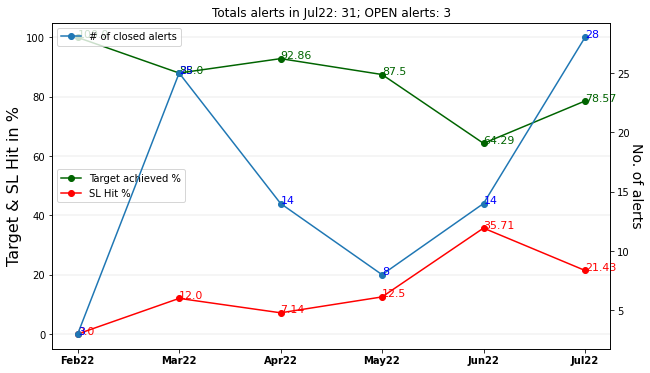

In [100]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, line_data[0], marker='o', color='darkgreen')
ax.plot(months, line_data[1], marker='o', color='red')
ax.grid(axis='y', lw=0.25)
#ax.set_ylim(0, 100)
ax.set_title(f'Totals alerts in {months[-1]}: {monthly_alerts[-1] + len(ons3)}; OPEN alerts: {len(ons3)}')

for i,j in enumerate(line_data[0]):
    ax.annotate(s=f'{round(j,2)}', xy=(i, j), xycoords='data', fontsize=11, color='darkgreen')
    
for i,j in enumerate(line_data[1]):
    ax.annotate(s=f'{round(j,2)}', xy=(i, j), xycoords='data', fontsize=11, color='red')

ax.legend(['Target achieved %', 'SL Hit %'], loc='center left', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('Target & SL Hit in %', fontsize=16)

ax2 = ax.twinx()
ax2.plot(months, monthly_alerts, marker='o')
ax2.set_ylabel('No. of alerts', fontsize=14, rotation=-90, labelpad=13)
ax2.legend(labels=['# of closed alerts'], loc='best', facecolor='white')

for i,j in enumerate(monthly_alerts):
    ax2.annotate(s=j, xy=(i, j), xycoords='data', fontsize=11, color='blue')

In [101]:
# fig, ax = plt.subplots(figsize=(10,7))
# ax.set_facecolor('white')

# ax.plot(months, np.array(monthlyTA_stats)[:, 0], marker='o', color='darkgreen')
# ax.plot(months, np.array(monthlyTA_stats)[:, 1], marker='o', color='saddlebrown')
# ax.plot(months, np.array(monthlyTA_stats)[:, 2], marker='o', color='darkslategrey')
# ax.grid(axis='y', lw=0.3)
# #ax.set_ylim(0, 100)

# for i,j in enumerate(np.array(monthlyTA_stats)):
#     ax.annotate(s=f'{round(j[0],2)}', xy=(i-0.1, j[0]+1), xycoords='data', fontsize=11, color='darkgreen')
#     ax.annotate(s=f'{round(j[1],2)}', xy=(i-0.1, j[1]+1), xycoords='data', fontsize=11, color='saddlebrown')    
#     ax.annotate(s=f'{round(j[2],2)}', xy=(i-0.1, j[2]+1), xycoords='data', fontsize=11, color='darkslategrey')  
    
# ax.legend(['% alerts that did not hit T2 & T3', 'T2', 'T3'], loc='upper right', bbox_to_anchor=(1, 0.3), facecolor='white')
# ax.set_xticklabels(labels = months, fontweight='bold')
# ax.set_ylabel('alerts that hit T1/T2/T3 in % of Total Target achieved', fontsize=12)

# RTP

In [102]:
dfrtp = pd.read_excel('D:/Yash/Python Projects/tgm_stk_tkr/default/data/RTP.xlsx')

In [103]:
# total alerts
total_alertsRTP = dfrtp.shape[0]
total_alertsRTP

85

In [104]:
# Total bullish alerts
total_bullRTP = dfrtp[dfrtp.Type=='Bullish'].shape[0]
total_bullRTP

85

In [105]:
#Total bearish alerts
total_bearRTP = dfrtp[dfrtp.Type=='Bearish'].shape[0]
total_bearRTP

0

In [106]:
#Total stagnant alerts
StagnantRTP = dfrtp[dfrtp.Result=='STAGNANT'].shape[0]
StagnantRTP

3

In [107]:
dfrtp[dfrtp.Result=='STAGNANT'].Type.value_counts()

Bullish    3
Name: Type, dtype: int64

#### removing OPEN alerts

In [108]:
ons4 = dfrtp[dfrtp.Result=='ON'].index # Identify OPEN/ON alerts
len(ons4), ons4 # all will be from current month

(6, Int64Index([2, 4, 5, 7, 9, 11], dtype='int64'))

In [109]:
on_count = dfrtp.iloc[ons4, :].Type.value_counts()
on_count

Bullish    6
Name: Type, dtype: int64

In [110]:
dfrtp.drop(ons4, axis=0, inplace=True) # Drop the ON alerts from analysis
dfrtp.shape

(79, 14)

### Target achieved v/s SL Hit chart

#### 0.5 weightage to STAGNANT

In [111]:
# Total Target achieved and SL Hit alerts
TA = dfrtp[dfrtp['result dummy']=='Target achieved'].shape[0]
SL = dfrtp[dfrtp['result dummy']=='SL Hit'].shape[0]
TA, SL

(57, 19)

In [112]:
# Total stagnant alerts
StagnantRTP

3

In [113]:
# (+)ive & (-)ive STAGNANT alerts
n1 = dfrtp[(dfrtp['result dummy']=='STAGNANT') & (dfrtp.Type=='Bullish') & (dfrtp['15DayClose']<dfrtp.Price)].shape[0]
p1 = dfrtp[(dfrtp['result dummy']=='STAGNANT') & (dfrtp.Type=='Bullish') & (dfrtp['15DayClose']>dfrtp.Price)].shape[0]

n2 = dfrtp[(dfrtp['result dummy']=='STAGNANT') & (dfrtp.Type=='Bearish') & (dfrtp['15DayClose']>dfrtp.Price)].shape[0]
p2 = dfrtp[(dfrtp['result dummy']=='STAGNANT') & (dfrtp.Type=='Bearish') & (dfrtp['15DayClose']<dfrtp.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 3)

In [114]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(57.0, 20.5)

In [115]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 73.55, 'SL Hit': 26.45}

Text(0, 0.5, '%')

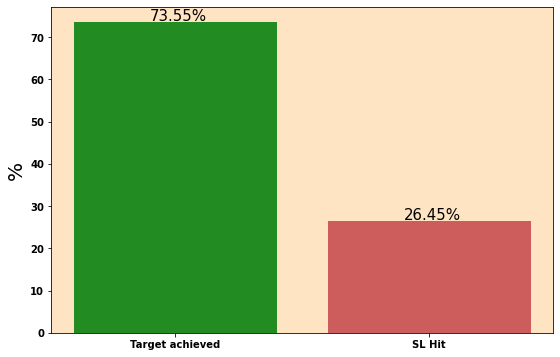

In [116]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

In [117]:
# TAstat = dfno[dfno.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
# TAstat = TAstat.sort_index()

# ax = plt.axes()

# TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

# for i,j in enumerate(TAstat.to_dict()):
#     ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

# #plt.grid(axis='y', lw=0.5)
# ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
# plt.yticks(fontweight='bold')
# plt.xticks(rotation=0, fontweight='bold')
# plt.ylabel(ylabel='%', fontsize=20)

### Avg NoD

In [118]:
# Avg no. of days needed to hit T1
dfrtp[dfrtp['result dummy']=='Target achieved'].NoD.mean()

3.280701754385965

### Bullish v/s Bearish alerts

#### Bullish

In [119]:
# Total bullish alerts
bull = dfrtp[dfrtp.Type=='Bullish']
print(bull.shape[0])
try:
    print(f"In actual {total_bullRTP}, +{on_count['Bullish']} that were removed as ON alerts")
except:
    print(f"In actual {total_bullRTP}")

79
In actual 85, +6 that were removed as ON alerts


In [120]:
# Total Target achieved and SL Hit alerts in bull df
TA = bull[bull['result dummy']=='Target achieved'].shape[0]
SL = bull[bull['result dummy']=='SL Hit'].shape[0]
TA, SL

(57, 19)

In [121]:
# Total stagnant alerts in Bullish alerts
bull[bull['result dummy']=='STAGNANT'].shape[0]

3

In [122]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']<bull.Price)].shape[0]
p = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']>bull.Price)].shape[0]
p, n

(0, 3)

In [123]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(57.0, 20.5)

In [124]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 73.55, 'SL Hit': 26.45}

Text(0, 0.5, '%')

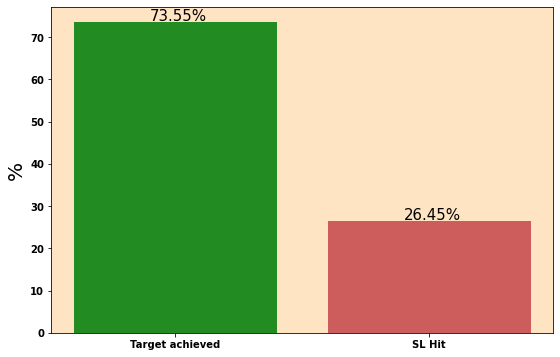

In [125]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### Bearish

In [126]:
# No bearish alerts generated in Cash_N500_Other segement
bear = dfrtp[dfrtp.Type=='Bearish']
bear.shape

(0, 14)

## Monthly Analysis

In [127]:
dfm = dfrtp.sort_values(by='Date').set_index('Date')

In [128]:
months = []
mos = pd.Series(dfm.index.to_numpy().astype('datetime64[M]')).unique()
for mo in mos:
    months.append(dt.datetime.date(pd.to_datetime(mo)).strftime(format="%b%y"))

In [129]:
monthly_stats = []
monthlyTA_stats = []
monthly_alerts = []
for i in months:
    month = dt.datetime.strptime(i, "%b%y").month                                               # current_month
    year = dt.datetime.strptime(i, "%b%y").year                                                 # current_year
    end = calendar.monthrange(year, month)[1]                      
    current_month = dfm.loc[f"{year}-{month}-01":f"{year}-{month}-{end}"]                  # get that month's df
    
    monthly_alerts.append(current_month.shape[0])                                   # total alerts in current month
    
    # Total Target achieved and SL Hit alerts in current month
    TA = current_month[current_month['result dummy']=='Target achieved'].shape[0]
    SL = current_month[current_month['result dummy']=='SL Hit'].shape[0]
    
    # (+)ive & (-)ive STAGNANT alerts
    n1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']<current_month.Price)].shape[0]
    p1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']>current_month.Price)].shape[0]

    n2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']>current_month.Price)].shape[0]
    p2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']<current_month.Price)].shape[0]

    p = p1 + p2
    n = n1 + n2
    
    # Weightage of 0.5 to TA & SL
    TA += p*0.5
    SL += n*0.5 
    
    current_stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
    monthly_stats.append(current_stat)
    
#     TAstat = current_month[current_month.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
#     if len(TAstat.index)<3:
#         y = ['T1','T2','T3']
#         TAstat[list(set(y).difference(set(TAstat.index)))[0]] = 0.0
#     TAstat = TAstat.sort_index()
#     monthlyTA_stats.append(TAstat)

### Line chart

In [130]:
line_data = ([x['Target achieved'] for x in monthly_stats]), ([x['SL Hit'] for x in monthly_stats])

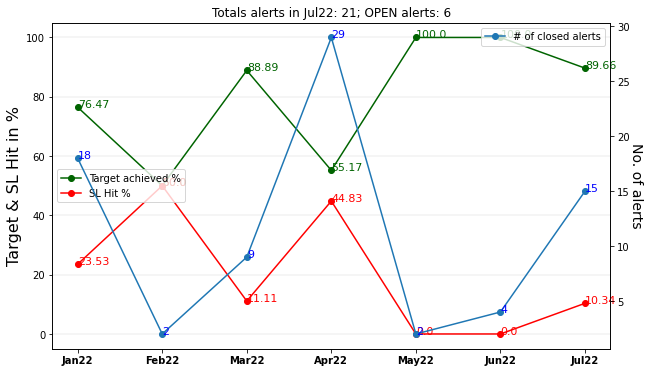

In [131]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, line_data[0], marker='o', color='darkgreen')
ax.plot(months, line_data[1], marker='o', color='red')
ax.grid(axis='y', lw=0.25)
#ax.set_ylim(0, 100)
ax.set_title(f'Totals alerts in {months[-1]}: {monthly_alerts[-1] + len(ons4)}; OPEN alerts: {len(ons4)}')

for i,j in enumerate(line_data[0]):
    ax.annotate(s=f'{round(j,2)}', xy=(i, j), xycoords='data', fontsize=11, color='darkgreen')
    
for i,j in enumerate(line_data[1]):
    ax.annotate(s=f'{round(j,2)}', xy=(i, j), xycoords='data', fontsize=11, color='red')

ax.legend(['Target achieved %', 'SL Hit %'], loc='center left', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('Target & SL Hit in %', fontsize=16)

ax2 = ax.twinx()
ax2.plot(months, monthly_alerts, marker='o')
ax2.set_ylabel('No. of alerts', fontsize=14, rotation=-90, labelpad=13)
ax2.legend(labels=['# of closed alerts'], loc='best', facecolor='white')

for i,j in enumerate(monthly_alerts):
    ax2.annotate(s=j, xy=(i, j), xycoords='data', fontsize=11, color='blue')

In [132]:
# fig, ax = plt.subplots(figsize=(10,7))
# ax.set_facecolor('white')

# ax.plot(months, np.array(monthlyTA_stats)[:, 0], marker='o', color='darkgreen')
# ax.plot(months, np.array(monthlyTA_stats)[:, 1], marker='o', color='saddlebrown')
# ax.plot(months, np.array(monthlyTA_stats)[:, 2], marker='o', color='darkslategrey')
# ax.grid(axis='y', lw=0.3)
# #ax.set_ylim(0, 100)

# for i,j in enumerate(np.array(monthlyTA_stats)):
#     ax.annotate(s=f'{round(j[0],2)}', xy=(i-0.1, j[0]+1), xycoords='data', fontsize=11, color='darkgreen')
#     ax.annotate(s=f'{round(j[1],2)}', xy=(i-0.1, j[1]+1), xycoords='data', fontsize=11, color='saddlebrown')    
#     ax.annotate(s=f'{round(j[2],2)}', xy=(i-0.1, j[2]+1), xycoords='data', fontsize=11, color='darkslategrey')  
    
# ax.legend(['% alerts that did not hit T2 & T3', 'T2', 'T3'], loc='upper right', bbox_to_anchor=(1, 0.3), facecolor='white')
# ax.set_xticklabels(labels = months, fontweight='bold')
# ax.set_ylabel('alerts that hit T1/T2/T3 in % of Total Target achieved', fontsize=12)

# Combined

In [133]:
df1 = pd.concat([dfcn, dfcf]).reset_index(drop=True)
df2 = pd.concat([dfno, dfrtp]).reset_index(drop=True)
df = pd.concat([df1, df2]).reset_index(drop=True).sort_values(by='Date')

In [134]:
print(df.shape[0]) 
total_alerts = total_alertsFO + total_alertsNC + total_alertsNO + total_alertsRTP
print("In actual, total alerts:", total_alerts)

878
In actual, total alerts: 898


In [135]:
# Total bullish alerts
print(df[df.Type=='Bullish'].shape[0]) 
total_bull = total_bullFO + total_bullNC + total_bullNO + total_bullRTP
print("In actual, total bullish alerts:", total_bull)

710
In actual, total bullish alerts: 728


In [136]:
#Total bearish alerts
print(df[df.Type=='Bearish'].shape[0])
total_bear = total_bearFO + total_bearNC  + total_bearNO + total_bearRTP
print("In actual, total bearish alerts:", total_bear)

168
In actual, total bearish alerts: 170


In [137]:
#Total stagnant alerts
total_stagnant = StagnantNC + StagnantFO + StagnantNO + StagnantRTP
total_stagnant

29

In [138]:
df[df.Result=='STAGNANT'].Type.value_counts()

Bullish    27
Bearish     2
Name: Type, dtype: int64

In [139]:
# ON Alerts have already been removed
df[df.Result=='ON'].shape[0]

0

### Target achieved v/s SL Hit chart

#### 0.5 weightage to STAGNANT

In [140]:
# Total Target achieved and SL Hit alerts
TA = df[df['result dummy']=='Target achieved'].shape[0]
SL = df[df['result dummy']=='SL Hit'].shape[0]
TA, SL

(597, 252)

In [141]:
# Total stagnant alerts
total_stagnant

29

In [142]:
# (+)ive & (-)ive STAGNANT alerts
n1 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bullish') & (df['15DayClose']<df.Price)].shape[0]
p1 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bullish') & (df['15DayClose']>df.Price)].shape[0]

n2 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bearish') & (df['15DayClose']>df.Price)].shape[0]
p2 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bearish') & (df['15DayClose']<df.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(4, 25)

In [143]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(599.0, 264.5)

In [144]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 69.37, 'SL Hit': 30.63}

Text(0, 0.5, '%')

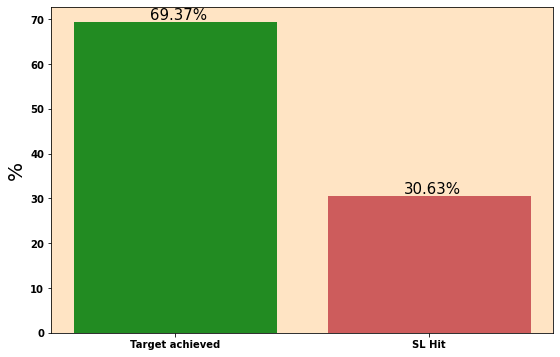

In [145]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

### (T1-T3) intra comparison

In [146]:
# TAstat = df[df.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
# TAstat = TAstat.sort_index()

# ax = plt.axes()

# TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

# for i,j in enumerate(TAstat.to_dict()):
#     ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

# #(axis='y', lw=0.5)
# ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
# plt.yticks(fontweight='bold')
# plt.xticks(rotation=0, fontweight='bold')
# plt.ylabel(ylabel='%', fontsize=20)

### Avg NoD

In [147]:
# Avg no. of days needed to reach the highest target
df[df['result dummy']=='Target achieved'].NoD.mean()

4.9296482412060305

### Bullish v/s Bearish alerts

#### Bullish

In [148]:
# Total bullish alerts
bull = df[df.Type=='Bullish']
print(bull.shape[0])
print(f"In actual {total_bull}, +{total_bullFO + total_bullNC + total_bullNO + total_bullRTP - bull.shape[0]} that were removed as ON alerts")

710
In actual 728, +18 that were removed as ON alerts


In [149]:
# Total Target achieved and SL Hit alerts in bull df
TA = bull[bull['result dummy']=='Target achieved'].shape[0]
SL = bull[bull['result dummy']=='SL Hit'].shape[0]
TA, SL

(482, 201)

In [150]:
# Total stagnant alerts in Bullish alerts
bull[bull['result dummy']=='STAGNANT'].shape[0]

27

In [151]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']<bull.Price)].shape[0]
p = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']>bull.Price)].shape[0]
p,n

(4, 23)

In [152]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(484.0, 212.5)

In [153]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 69.49, 'SL Hit': 30.51}

Text(0, 0.5, '%')

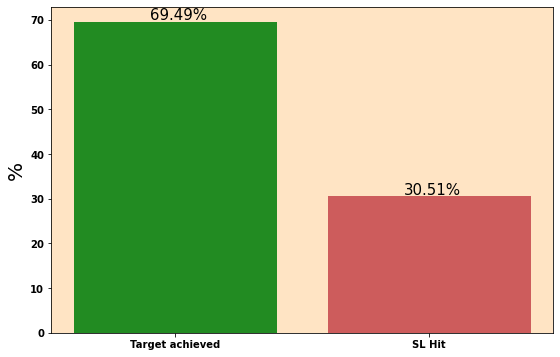

In [154]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### Bearish

In [155]:
# Total bearish alerts
bear = df[df.Type=='Bearish']
print(bear.shape[0])
print(f"In actual {total_bear}, +{total_bearFO + total_bearNC + total_bearNO + total_bearRTP - bear.shape[0]} that were removed as ON alerts")

168
In actual 170, +2 that were removed as ON alerts


In [156]:
# Total Target achieved and SL Hit alerts in bear df
TA = bear[bear['result dummy']=='Target achieved'].shape[0]
SL = bear[bear['result dummy']=='SL Hit'].shape[0]
TA, SL

(115, 51)

In [157]:
# Total stagnant alerts in bearish alerts
bear[bear['result dummy']=='STAGNANT'].shape[0]

2

In [158]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']>bear.Price)].shape[0]
p = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']<bear.Price)].shape[0]
p,n

(0, 2)

In [159]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(115.0, 52.0)

In [160]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 68.86, 'SL Hit': 31.14}

Text(0, 0.5, '%')

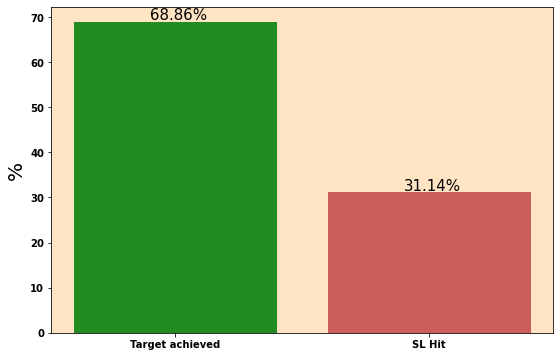

In [161]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

## Monthly Analysis

In [162]:
dfm = df.set_index('Date')

In [163]:
months = []
mos = pd.Series(dfm.index.to_numpy().astype('datetime64[M]')).unique()
for mo in mos:
    months.append(dt.datetime.date(pd.to_datetime(mo)).strftime(format="%b%y"))

In [164]:
monthly_stats = []
monthlyTA_stats = []
monthly_alerts = []
for i in months:
    month = dt.datetime.strptime(i, "%b%y").month                                               # current_month
    year = dt.datetime.strptime(i, "%b%y").year                                                 # current_year
    end = calendar.monthrange(year, month)[1]                      
    current_month = dfm.loc[f"{year}-{month}-01":f"{year}-{month}-{end}"]                  # get that month's df
    
    monthly_alerts.append(current_month.shape[0])                                   # total alerts in current month
    
    # Total Target achieved and SL Hit alerts in current month
    TA = current_month[current_month['result dummy']=='Target achieved'].shape[0]
    SL = current_month[current_month['result dummy']=='SL Hit'].shape[0]
    
    # (+)ive & (-)ive STAGNANT alerts
    n1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']<current_month.Price)].shape[0]
    p1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']>current_month.Price)].shape[0]

    n2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']>current_month.Price)].shape[0]
    p2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']<current_month.Price)].shape[0]

    p = p1 + p2
    n = n1 + n2
    
    # Weightage of 0.5 to TA & SL
    TA += p*0.5
    SL += n*0.5 
    
    current_stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
    monthly_stats.append(current_stat)
    
#     TAstat = current_month[current_month.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
#     if len(TAstat.index)<3:
#         y = ['T1','T2','T3']
#         TAstat[list(set(y).difference(set(TAstat.index)))[0]] = 0.0
#     TAstat = TAstat.sort_index()
#     monthlyTA_stats.append(TAstat)

### Line chart

In [165]:
line_data = ([x['Target achieved'] for x in monthly_stats]), ([x['SL Hit'] for x in monthly_stats])

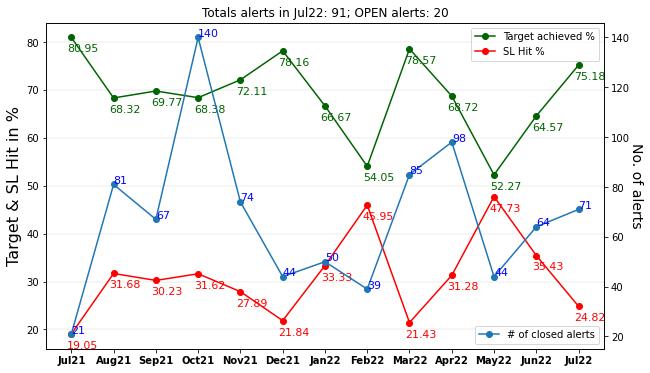

In [166]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, line_data[0], marker='o', color='darkgreen')
ax.plot(months, line_data[1], marker='o', color='red')
ax.grid(axis='y', lw=0.25)
#ax.set_ylim(0, 100)
ax.set_title(f'Totals alerts in {months[-1]}: {monthly_alerts[-1] + len(ons1) + len(ons2) + len(ons3) + len(ons4)}; OPEN alerts: {len(ons1) + len(ons2) + len(ons3) + len(ons4)}')

for i,j in enumerate(line_data[0]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j-3), xycoords='data', fontsize=11, color='darkgreen')
    
for i,j in enumerate(line_data[1]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j-3), xycoords='data', fontsize=11, color='red')

ax.legend(['Target achieved %', 'SL Hit %'], loc='best', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('Target & SL Hit in %', fontsize=16)

ax2 = ax.twinx()
ax2.plot(months, monthly_alerts, marker='o')
ax2.set_ylabel('No. of alerts', fontsize=14, rotation=-90, labelpad=13)
ax2.legend(labels=['# of closed alerts'], loc='lower right', facecolor='white')

for i,j in enumerate(monthly_alerts):
    ax2.annotate(s=j, xy=(i, j+0.4), xycoords='data', fontsize=11, color='blue')

In [167]:
# fig, ax = plt.subplots(figsize=(10,7))
# ax.set_facecolor('white')

# ax.plot(months, np.array(monthlyTA_stats)[:, 0], marker='o', color='darkgreen')
# ax.plot(months, np.array(monthlyTA_stats)[:, 1], marker='o', color='saddlebrown')
# ax.plot(months, np.array(monthlyTA_stats)[:, 2], marker='o', color='darkslategrey')
# ax.grid(axis='y', lw=0.3)
# #ax.set_ylim(0, 100)

# for i,j in enumerate(np.array(monthlyTA_stats)):
#     ax.annotate(s=f'{round(j[0],2)}', xy=(i-0.1, j[0]+1), xycoords='data', fontsize=11, color='darkgreen')
#     ax.annotate(s=f'{round(j[1],2)}', xy=(i-0.1, j[1]+1), xycoords='data', fontsize=11, color='saddlebrown')    
#     ax.annotate(s=f'{round(j[2],2)}', xy=(i-0.1, j[2]+1), xycoords='data', fontsize=11, color='darkslategrey')  
    
# ax.legend(['% alerts that did not hit T2 & T3', 'T2', 'T3'], loc='best', bbox_to_anchor=(0.5, 1), facecolor='white')
# ax.set_xticklabels(labels = months, fontweight='bold')
# ax.set_ylabel('alerts that hit T1/T2/T3 in % of Total Target achieved', fontsize=12)